In [1]:
from controller import Controller
import os
import warnings


warnings.filterwarnings('ignore')

path_to_data = os.path.join(os.curdir, 'generated_data/thesis_simple_test1/train.csv')
path_to_config = os.path.join(os.curdir, 'generated_data/thesis_simple_test1/train.ini')
path_to_observation = os.path.join(os.curdir, 'generated_data/thesis_simple_test1/single1.csv')
assert all([os.path.isfile(path) for path in[path_to_config, path_to_data, path_to_observation]])


In [2]:
c = Controller()

# 10-fold cross validation
f1_scores = c.kfold_cross_validation(path_to_data=path_to_data,
                         path_to_config=path_to_config,
                         csv_delimiter=',',
                         hidden_marker='diagnosis',
                         layers=['mobility', 'motoric', 'neuro'],
                         k = 10)



100%|██████████| 30/30 [00:00<00:00, 731.69it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.8397353381279369


100%|██████████| 30/30 [00:00<00:00, 714.22it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.8367108412710166


100%|██████████| 30/30 [00:00<00:00, 714.22it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.7857026075153714


100%|██████████| 30/30 [00:00<00:00, 731.76it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.8568877906932243


100%|██████████| 30/30 [00:00<00:00, 681.78it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.816396835754366


100%|██████████| 30/30 [00:00<00:00, 731.65it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.8047768478037601


100%|██████████| 30/30 [00:00<00:00, 697.57it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.7718039130053199


100%|██████████| 30/30 [00:00<00:00, 731.63it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.8317205225908705


100%|██████████| 30/30 [00:00<00:00, 697.61it/s]


The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.8260667316545657


100%|██████████| 30/30 [00:00<00:00, 728.21it/s]

The multiclass F1-Score was calculated. The resulting score is an average over all samples. F1-Score : 0.815288399492554
The mean score is 0.8185089827908986 with a standart deviation of 0.024387475712721023.


In [3]:
# construct our model
c.construct(path_to_data=path_to_data,
            path_to_config=path_to_config,
            csv_delimiter=',')

"""
We are trying to make a sequence to sequence prediction. Solely from the sequences for markers
of the layers mobility, motoric and neuro, we will try to infer the sequence of hidden states for the marker 'diagnosis'.
"""

c.optimal_state_sequence(path_to_observation=path_to_observation,
                         csv_delimiter=',',
                         hidden_marker='diagnosis',
                         layers=['mobility', 'motoric', 'neuro'])

,id,date,mobility,motoric,neuro,diagnosis,Predicted state for diagnosis
0,0,2022-08-03,good,med-good,med-bad,good,good
1,0,2022-08-04,good,good,good,good,good
2,0,2022-08-09,med-good,med-good,bad,med-good,med-good
3,0,2022-08-11,med-good,med,med-bad,med-good,med-good
4,0,2022-08-12,good,med-good,med-good,med-good,med-good
5,0,2022-08-13,med,med-bad,med,med-good,med
6,0,2022-08-14,med-good,med,bad,med,med
7,0,2022-08-15,med,med,med-bad,med,med
8,0,2022-08-16,good,med-bad,med-bad,med,med
9,0,2022-08-22,med-bad,bad,med,med,med


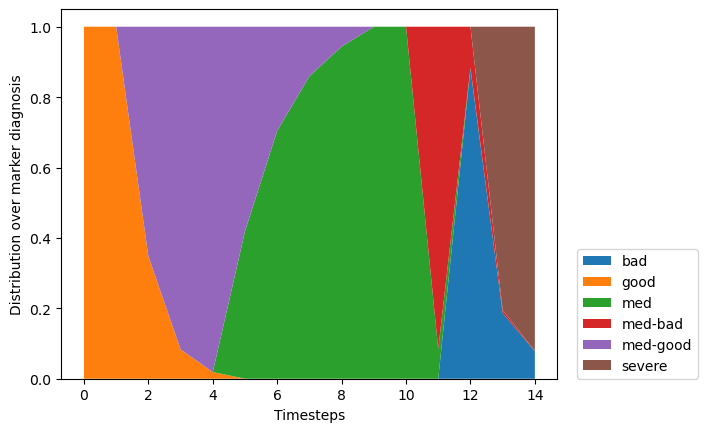

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.88074786, 0.18666136, 0.07786666],
       [1.        , 1.        , 0.34818218, 0.08330829, 0.01898931,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.41900105, 0.7044731 , 0.85946989, 0.94362527, 1.        ,
        1.        , 0.08441659, 0.00211776, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.91558341, 0.11713438, 0.00857112, 0.00145809],
       [0.        , 0.        , 0.65181782, 0.91669171, 0.98101069,
        0.58099895, 0.2955269 , 0.14053011, 0.05637473, 0.        ,
        0.        , 0.        , 0.        , 

In [4]:
""" Now, let us try to plot the priors for the hiddens states. This time, we only use the layer motoric. """

c.plot_posterior_distribution(path_to_observation=path_to_observation,
                              csv_delimiter=',',
                              layers= ['motoric'],
                              hidden_marker='diagnosis')

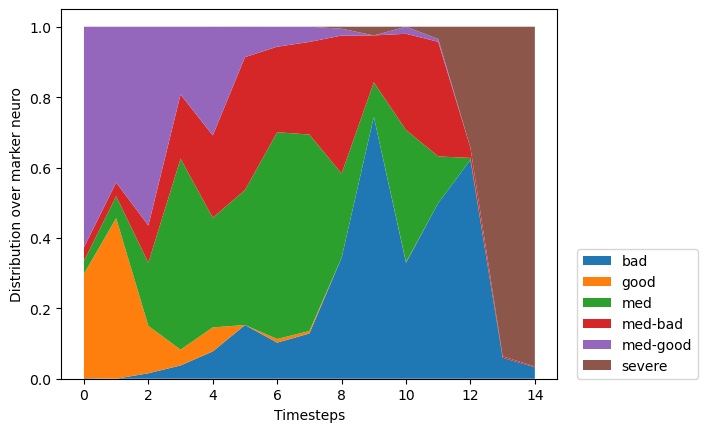

array([[1.71401767e-03, 0.00000000e+00, 1.54694946e-02, 3.77320810e-02,
        7.75951390e-02, 1.52559481e-01, 1.02559389e-01, 1.28549774e-01,
        3.43766309e-01, 7.43910627e-01, 3.29753499e-01, 4.98850121e-01,
        6.21867048e-01, 5.95807525e-02, 3.26113932e-02],
       [2.96388497e-01, 4.56032542e-01, 1.34673867e-01, 4.48528267e-02,
        6.81953795e-02, 0.00000000e+00, 1.03705514e-02, 7.07432746e-03,
        0.00000000e+00, 0.00000000e+00, 1.45920492e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.64028055e-02, 6.23450211e-02, 1.79432414e-01, 5.42435720e-01,
        3.11658418e-01, 3.83463214e-01, 5.87355880e-01, 5.58057141e-01,
        2.39056086e-01, 9.80446593e-02, 3.75530769e-01, 1.32720320e-01,
        5.41011621e-03, 0.00000000e+00, 0.00000000e+00],
       [3.86779655e-02, 3.90724869e-02, 1.05732228e-01, 1.82527936e-01,
        2.33791247e-01, 3.77504591e-01, 2.42862331e-01, 2.63083952e-01,
        3.92056077e-01, 1.33327055e-0

In [8]:
"""To continue our analysis, let us try to predict the posteriors for the hidden state neuro solely from the layer motoric"""
c.plot_posterior_distribution(path_to_observation=path_to_observation,
                              csv_delimiter=',',
                              layers= ['motoric'],
                              hidden_marker='neuro')

In [9]:
"""Similarily, let us try to predict the optimal state sequence for the hidden state neuro from the layers motoric and mobility"""

c.optimal_state_sequence(path_to_observation=path_to_observation,
                         csv_delimiter=',',
                         hidden_marker='neuro',
                         layers=['mobility', 'motoric'])

,id,date,mobility,motoric,neuro,diagnosis,Predicted state for neuro
0,0,2022-08-03,good,med-good,med-bad,good,med-good
1,0,2022-08-04,good,good,good,good,good
2,0,2022-08-09,med-good,med-good,bad,med-good,med-good
3,0,2022-08-11,med-good,med,med-bad,med-good,med
4,0,2022-08-12,good,med-good,med-good,med-good,med
5,0,2022-08-13,med,med-bad,med,med-good,bad
6,0,2022-08-14,med-good,med,bad,med,bad
7,0,2022-08-15,med,med,med-bad,med,bad
8,0,2022-08-16,good,med-bad,med-bad,med,bad
9,0,2022-08-22,med-bad,bad,med,med,bad
